## Verovatnoca i statistika

### Ocene studenata i metodi nad njima

In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as pt

data = pd.read_csv("~/Desktop/StudentsPerformance.csv")
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


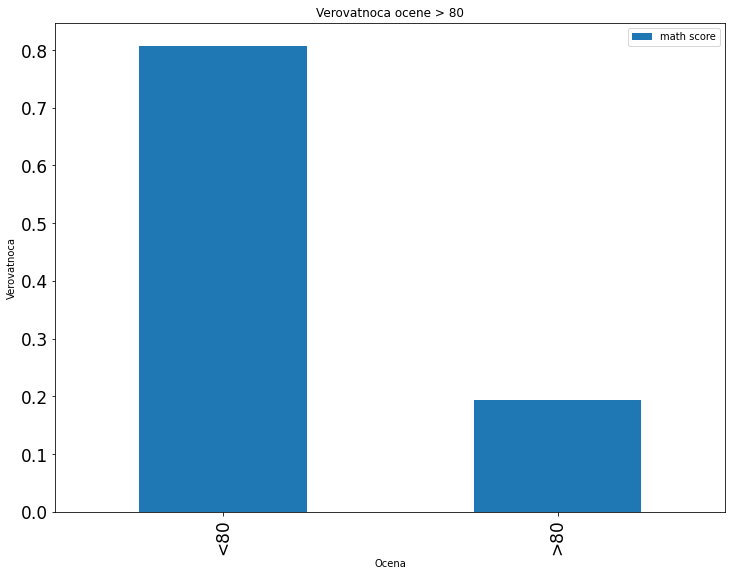

     math score
<80       0.807
>80       0.193


In [2]:
data_score = (data['math score']>=80).value_counts()
P_vo = pd.DataFrame(data_score/data_score.sum())
P_vo.index=["<80",">80"]
P_vo.plot.bar(figsize=(12,9),fontsize=17)

pt.title("Verovatnoca ocene > 80")
pt.xlabel("Ocena")
pt.ylabel("Verovatnoca")
pt.show()
print(P_vo)

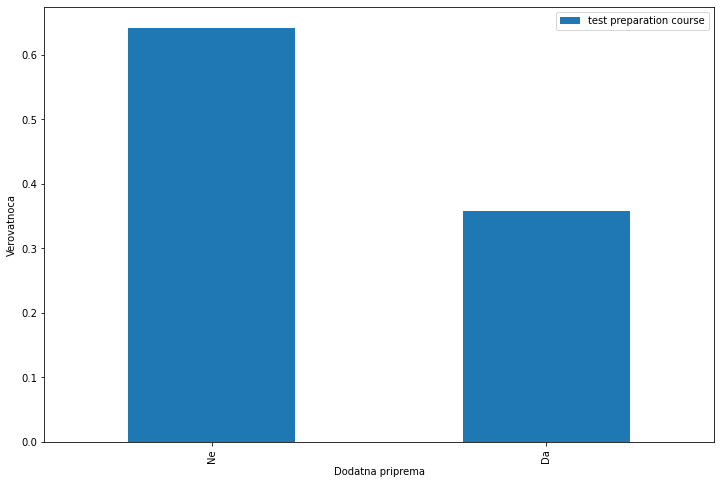

In [3]:
data_tpc = (data['test preparation course']).value_counts()
P_tpc = pd.DataFrame(data_tpc/data_tpc.sum())
P_tpc.index=["Ne","Da"]
P_tpc.plot.bar(figsize=(12,8))
pt.xlabel("Dodatna priprema")
pt.ylabel("Verovatnoca")
pt.show()

completed     88
none         105
Name: test preparation course, dtype: int64


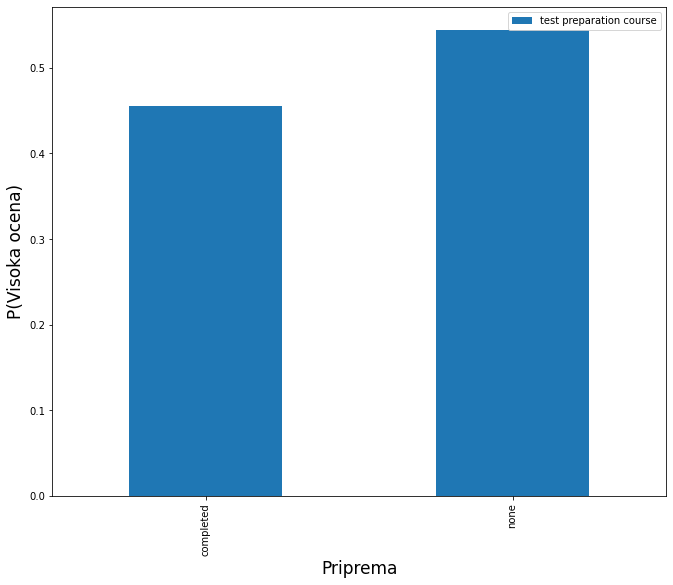

In [4]:
ocena=80
data_vp = data.loc[,'test preparation course']
data_vp.shape
print(data_vp.value_counts().sort_index())
P_ocene_priprema=pd.DataFrame((data_vp.value_counts()/data_vp.shape[0]).sort_index())
P_ocene_priprema.plot.bar(figsize=(11,9))
pt.xlabel("Priprema",fontsize=17)
pt.ylabel("P(Visoka ocena)",fontsize=17)

pt.show()

Verovatnoca da ce student imati ocenu vecu od 75 (in reading) u citanju:

Text(0.5, 1.0, 'Ocena pisanje >= 60')

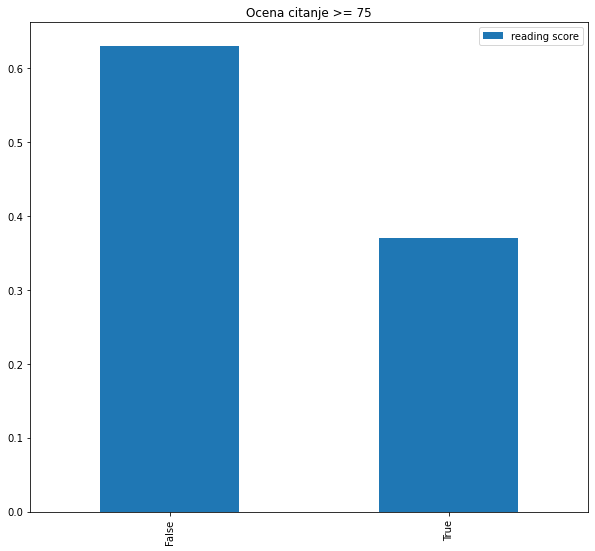

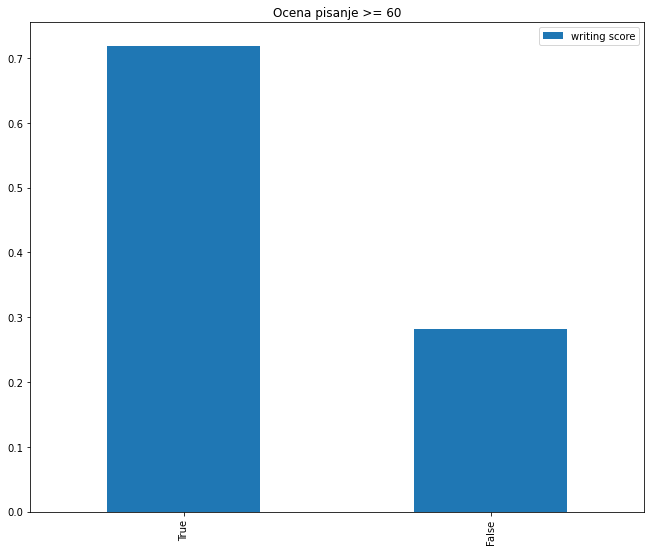

In [5]:
student_citanje = (data['reading score']>=75).value_counts()
P_sc = pd.DataFrame(student_citanje/len(data))
P_sc.plot.bar(figsize=(10,9))
pt.title("Ocena citanje >= 75")


student_pisanje = (data['writing score']>=60).value_counts()
P_sp = pd.DataFrame(student_pisanje/len(data))
P_sp.plot.bar(figsize=(11,9))
pt.title("Ocena pisanje >= 60")





In [6]:
data.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

<AxesSubplot:xlabel='math score', ylabel='Count'>

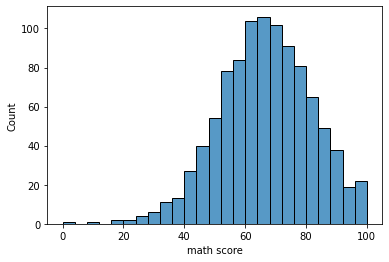

In [7]:
sb.histplot(data['math score'])

/home/skic01/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

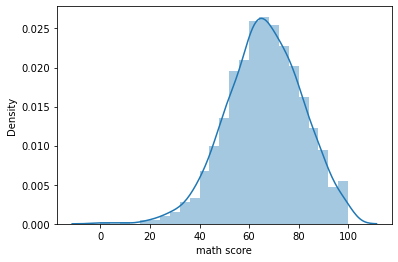

In [8]:
pt.plot(figsize=(12,10))
sb.distplot(data['math score'])


<AxesSubplot:xlabel='writing score', ylabel='Count'>

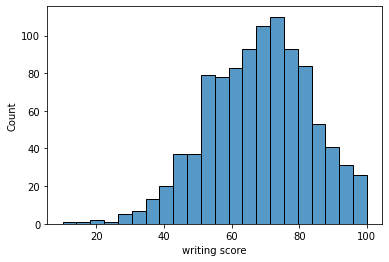

In [9]:
sb.histplot(data['writing score'])

/home/skic01/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

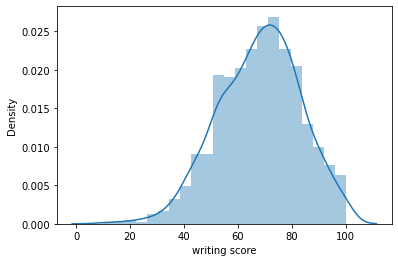

In [10]:
pt.plot(figsize=(12,10))
sb.distplot(data['writing score'])

<AxesSubplot:xlabel='reading score', ylabel='Count'>

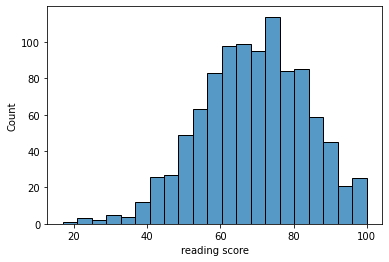

In [11]:
sb.histplot(data['reading score'])

/home/skic01/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

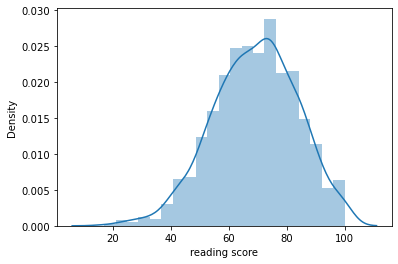

In [12]:
pt.plot(figsize=(12,9))
sb.distplot(data['reading score'])


In [13]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


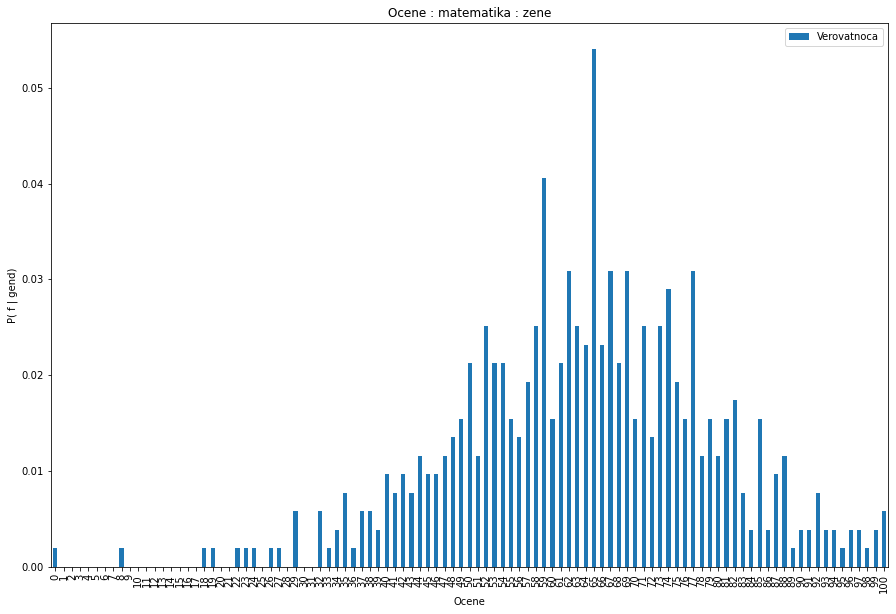

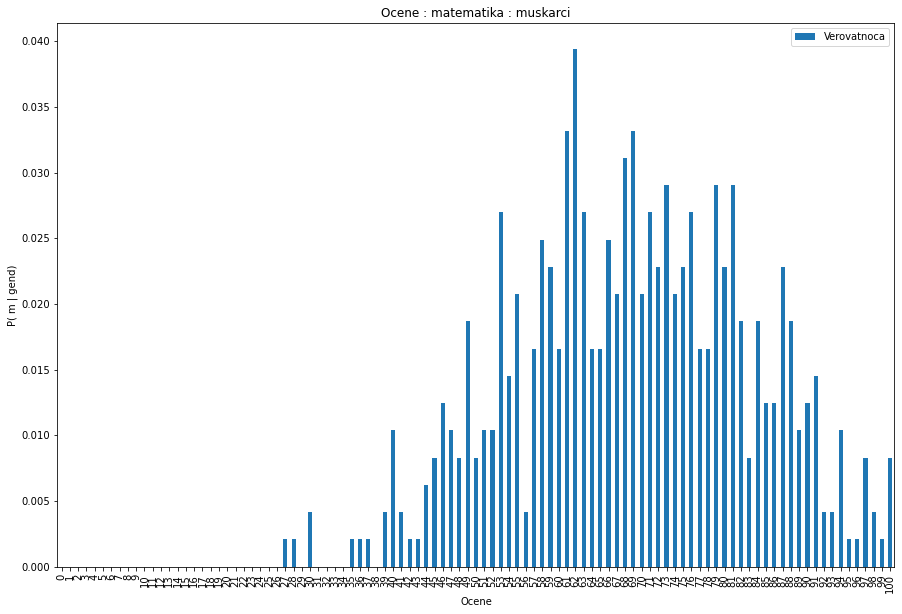

In [14]:
ocena=data["math score"].value_counts()
P_fmat = pd.DataFrame(index=range(0,101))
data_fmat = data.loc[data['gender']=='female','math score'].value_counts()
P_fmat["Verovatnoca"]=(data_fmat/data_fmat.sum())
P_fmat=P_fmat.fillna(0)
P_fmat.plot.bar(figsize=(15,10))
pt.xlabel("Ocene")
pt.ylabel("P( f | gend)")
pt.title("Ocene : matematika : zene")
pt.show()

P_mmat = pd.DataFrame(index=range(0,101))
data_mmat = data.loc[data['gender']=='male','math score'].value_counts()
P_mmat["Verovatnoca"]=(data_mmat/data_mmat.sum())
P_mmat=P_mmat.fillna(0)
P_mmat.plot.bar(figsize=(15,10))
pt.title("Ocene : matematika : muskarci")
pt.xlabel("Ocene")
pt.ylabel("P( m | gend)")
pt.show()

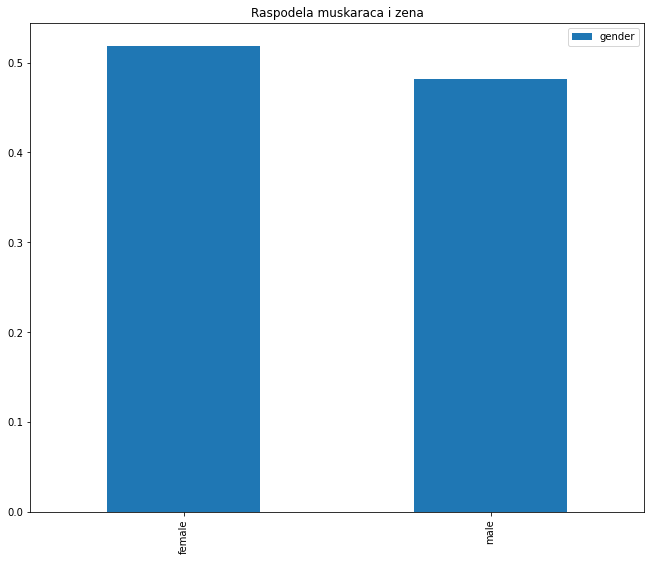

In [15]:
data_gen = data['gender'].value_counts()
P_gen = pd.DataFrame(data_gen/data_gen.sum())

P_gen.plot.bar(figsize=(11,9))
pt.title("Raspodela muskaraca i zena")
pt.show()

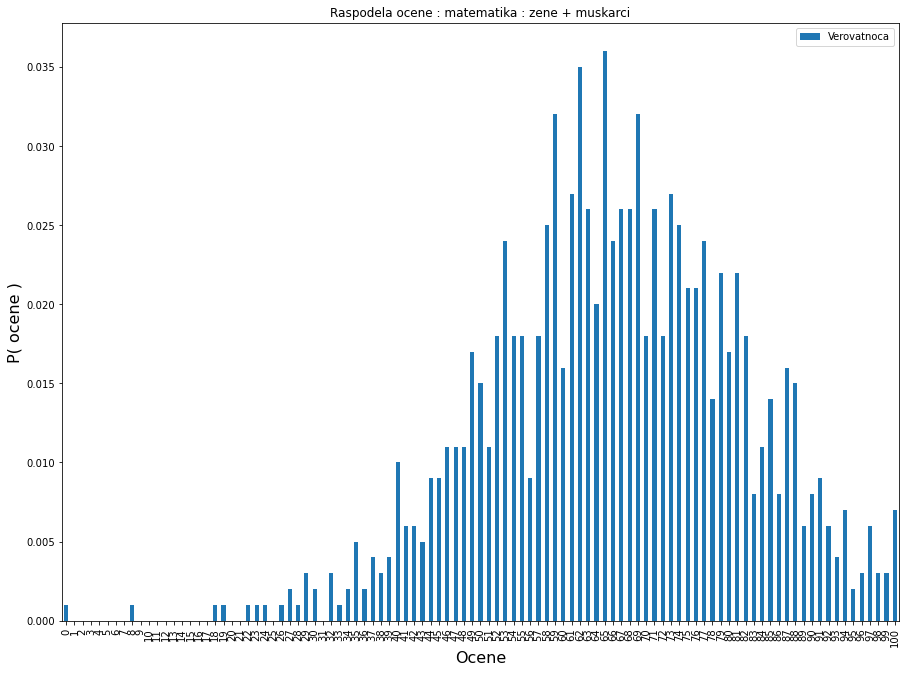

In [16]:
P_mat = P_fmat*P_gen.loc['female'].values + P_mmat*P_gen.loc['male'].values
P_mat.plot.bar(figsize=(15,11))
pt.xlabel("Ocene",fontsize=16)
pt.ylabel("P( ocene )",fontsize=16)
pt.title("Raspodela ocene : matematika : zene + muskarci")
pt.show()

In [17]:
E_mmat = np.sum([ocena*verovatnoca for ocena,verovatnoca in zip(P_mmat.index,P_mmat.values)])
E_fmat = np.sum([ocena*verovatnoca for ocena,verovatnoca in zip(P_fmat.index,P_fmat.values)])
print("Predmet matematika \n")
print("Matematicko ocekivanje : \n\n","E[musko|mat]   {:.3f}".format(E_mmat),"\n E[zenksko|mat] {:.3f}".format(E_fmat))
E_mat = np.dot(P_mat.index,P_mat.values)
print(" E[matematika]",E_mat)

Predmet matematika 

Matematicko ocekivanje : 

 E[musko|mat]   68.728 
 E[zenksko|mat] 63.633
 E[matematika] [66.089]


In [18]:
atributi = ['math score','reading score','writing score']
analiza = data[atributi]
analiza.head()


,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [19]:
#estimacija medijane za parametre
analiza.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

In [20]:
#aritmeticka sredina ocena
analiza.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [21]:
#standardna devijacija 
analiza.std()

math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64

In [22]:
#estimiranje kvantila 
analiza.quantile(0.3)

math score       59.0
reading score    62.0
writing score    60.0
Name: 0.3, dtype: float64

In [23]:
#kovarijansa
analiza.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [24]:
#koeficijent korelacije 
Kc1 = analiza.cov()['math score']['reading score']/(analiza.cov()['math score']['math score']*analiza.cov()['reading score']['reading score'])**0.5
print("Koeficijent korelacije ocena matematike i citanja \n",Kc1)

analiza.describe()

Koeficijent korelacije ocena matematike i citanja 
 0.8175796636720539


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


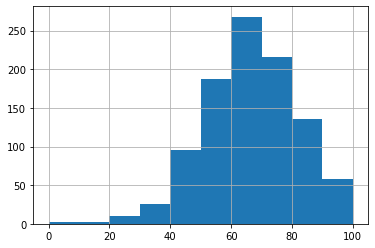

In [25]:
math=data['math score']
math.shape
his = math.hist()
pt.show()

In [26]:
math.describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

In [27]:
sample = math.sample(10)
sample.values.mean()

66.9

###### Estimacija srednje vrednosti sa manjim uzorkom

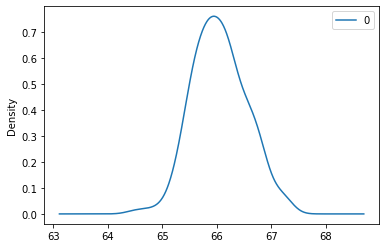

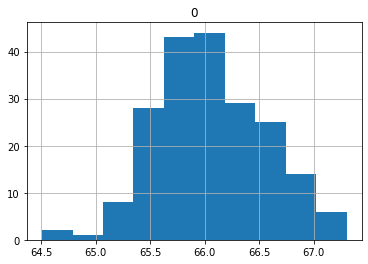

In [28]:
from scipy import stats
E_srednje =[]
velicina_uzorka=500
br_estimacija_srv= 200
for x in range(br_estimacija_srv):
        sample= math.sample(velicina_uzorka)
        E_srednje.append(sample.values.mean())
### Gustina verovatnoce raspodele srednjih vrednosti za math score
sf = pd.DataFrame(E_srednje).plot(kind='density')
##histogram srednjih vrednosti
hist = pd.DataFrame(E_srednje).hist()
pt.show()

Interval poverenja za srednju ocenu iz matematike je : 

 (64.95092185112796, 67.60907814887204)


Text(0.5, 1.0, 'Interval poverenja (math score)')

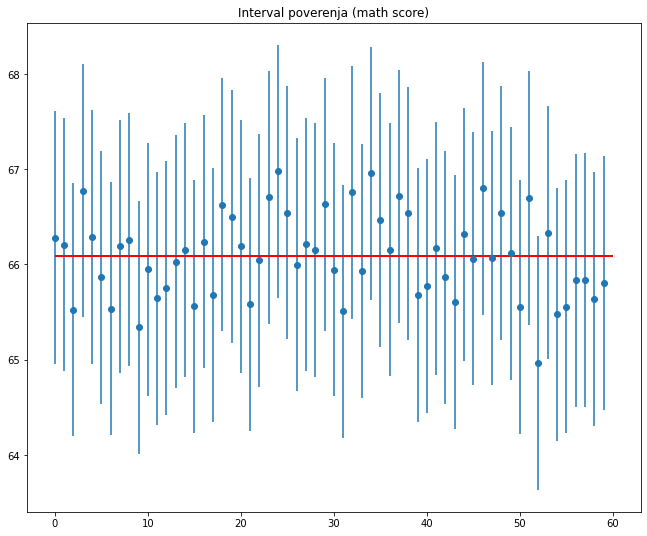

In [29]:
st=math.std()
a=0.05
##Normalna raspodela Interval poverenja za ocenu srednje vrednosti (math score)
r_kvantila=1-a/2
Kvantil =stats.norm.ppf(r_kvantila)
marg = Kvantil*(st/velicina_uzorka**0.5)
CI=(E_srednje[0]-marg,E_srednje[0]+marg)
print("Interval poverenja za srednju ocenu iz matematike je : \n\n",CI)
Interval_p = []
for i in range(0,60):
    Interval_p.append((E_srednje[i]-marg, E_srednje[i]+marg))
pt.figure(figsize=(11,9))
pt.errorbar(x=np.arange(0,60),y=E_srednje[0:60],
            yerr=[(gornja-donja)/2 for gornja,donja in Interval_p],fmt='o')
pt.hlines(xmin=0,xmax=60,y=math.mean(),linewidth=2.0,color='red')
pt.title("Interval poverenja (math score)")

In [81]:

wr='writing score'
wrdat=data[wr]

In [ ]:
##Kolomogorov-Smirnov test - 

KstestResult(statistic=0.08476528362349778, pvalue=0.4445550129515319)


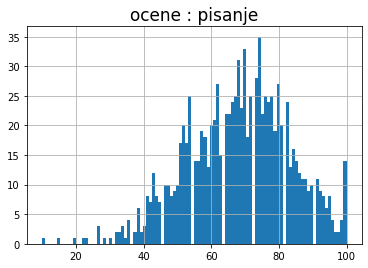

In [83]:
histwr=wrdat.hist(bins=100)
pt.title("ocene : pisanje",fontsize=17)
pt.show
print(stats.kstest(wrdat.sample(msample).dropna().values.T, cdf='norm',args=(wrdat.dropna().values.mean(), wrdat.dropna().values.std())))
##arg srednja vrednost i odstupanje

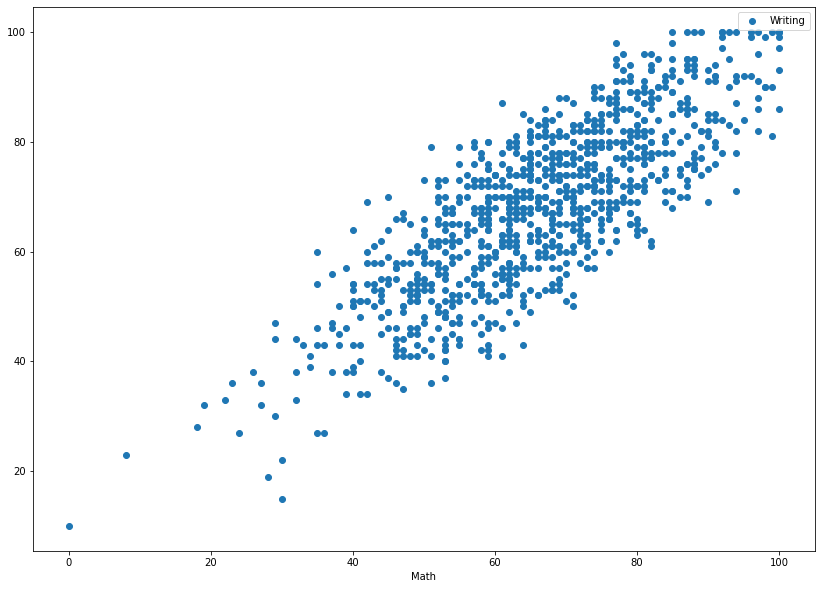

In [106]:
data_tidy = data.rename(columns = {'math score': 'Math', 'writing score': 'Writing','reading score': 'Reading'}, inplace = False)

atr=['Math','Writing']

regdata=data_tidy[atr]
regdata.plot('Math','Writing',style='o',figsize=(14,10))

pt.show()

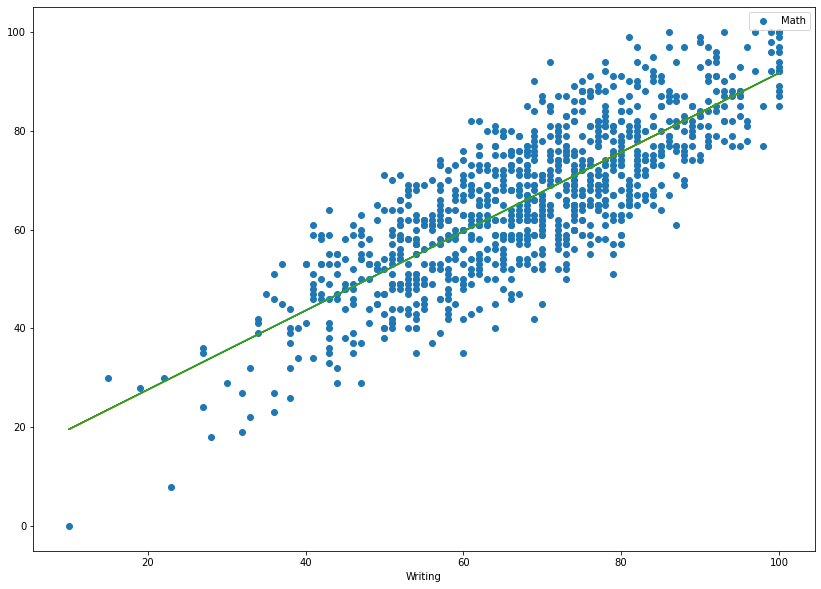

In [107]:
import statsmodels.formula.api as sm

C1=sm.ols("Math ~ Writing",regdata).fit()
C2=sm.ols("Math ~ Writing",regdata[:-1]).fit()
regdata.plot("Writing",'Math',style='o',figsize=(14,10))
pt.plot(regdata.Writing, C1.fittedvalues)
pt.plot(regdata.Writing[:-1],C2.fittedvalues)
pt.show()

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats
from statsmodels.formula.api import ols

In [112]:
ars=['Reading','Writing']
rd_wr=data_tidy[ars]


,Reading,Writing
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75


In [113]:
R=np.array(rd_wr['Reading'])
R=np.array([np.ones(len(R)),R])
W=np.array(rd_wr['Writing'])
print(R.shape,W.shape)

(2, 1000) (1000,)


<ipython-input-121-06d6c88885ac>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  par=np.linalg.lstsq(R.T,W)[0]


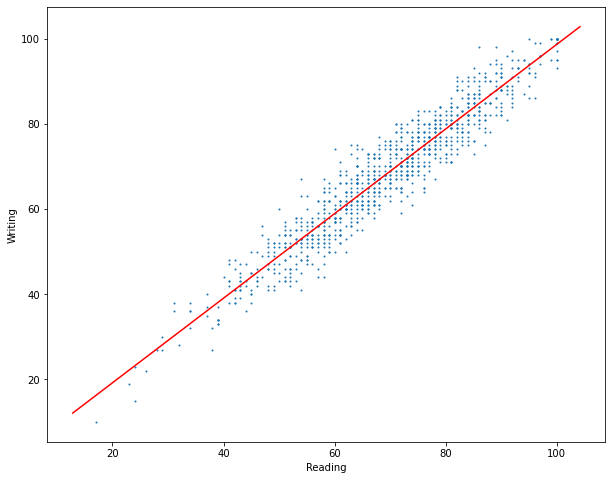

In [121]:
par=np.linalg.lstsq(R.T,W)[0]
par
def f(x,w):
    return w[0]+w[1]*x

rx=rd_wr.plot(kind='scatter',s=1,x='Reading',y='Writing',figsize=[10,8])
x0,x1=plt.xlim()
rx.plot([x0,x1],[f(x0,par),f(x1,par)],'r')
plt.show()

In [ ]:
###Visestruka regresija

In [130]:
att=['Math','Writing','Reading']
datamod=data_tidy[att]
mod1=ols('Math ~ Writing',datamod).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Math   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          3.38e-226
Time:                        11:16:57   Log-Likelihood:                -3620.6
No. Observations:                1000   AIC:                             7245.
Df Residuals:                     998   BIC:                             7255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5831      1.314      8.817      0.000       9.005      14.161
Writing        0.8009      0.019     42.511      0.000       0.764       0.838
==============================================================================
Omnibus:                       16.229   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.616
Skew:                           0.019   Prob(JB):                      0.00816
Kurtosis:                       2.521   Cond. No.                         320.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
mod2=ols('Math ~ Writing + Reading',datamod).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Math   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          2.25e-243
Time:                        11:18:15   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5241      1.328      5.665      0.000       4.918      10.131
Writing        0.2494      0.061      4.118      0.000       0.131       0.368
Reading        0.6013      0.063      9.538      0.000       0.478       0.725
==============================================================================
Omnibus:                       10.227   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.801
Skew:                           0.006   Prob(JB):                       0.0334
Kurtosis:                       2.596   Cond. No.                         481.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
mod3=ols('Math ~ Writing * Reading',datamod).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Math   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     687.3
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          5.10e-242
Time:                        11:18:56   Log-Likelihood:                -3576.4
No. Observations:                1000   AIC:                             7161.
Df Residuals:                     996   BIC:                             7180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7615      4.107      0.916      0.360      -4.298      11.821
Writing             0.3077      0.085      3.603      0.000       0.140       0.475
Reading             0.6618      0.089      7.457      0.000       0.488       0.836
Writing:Reading    -0.0009      0.001     -0.968      0.333      -0.003       0.001
==============================================================================
Omnibus:                       11.197   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.283
Skew:                           0.004   Prob(JB):                       0.0262
Kurtosis:                       2.582   Cond. No.                     7.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""